# Sprint 2 Updated Data Collection, Cleaning, and EDA for Attractions
---

In [1]:
# import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Table of Contents
- Data Dictionary
- Updated Data Collection
- Updated Data Cleaning
    - Filter Columns
    - Drop last Row with Nulls
    - Rating and Review Data Type Conversion
    - Reduce Unique Values and One-Hot-Encode Main Category
- Update Exploratory Data Analysis

--- 

## Data Dictionary 
|Column Name| Description|
|---|---|
|`place_id`|generated identification made by Google Maps Extractor|
|`name`|name of attraction|
|`description`|details of description as seen on Google Maps|
|`reviews`|number of reviews for attraction|
|`competitors`|similiar attractions by Google Caps|
|`website`|link to attraction website|
|`phone`|phone number of attraction|
|`can_claim`|???|
|`owner_name`|owner of attraction|
|`owner_profile_link`|link to owner of attraction|
|`featured_image`|image displayed on google map|
|`main_category`|main category assigned to attraction by Google Maps|
|`categories`|categories assigned to attraction by Google Maps|
|`rating`|average rating of attraction|
|`workday_timing`|operating hours of attraction|
|`is_temporarily_closed`|???|
|`closed_on`|closing day(s) of attraction by Google Maps|
|`address`|address of attraction|
|`review_keywords`|frequent words in review for attractions by Google Maps|
|`link`|link to google map about attraction|
|`query`|user input on search engine of Google Maps Extractor|

## Updated Data Collection

In [2]:
# load and view vancouver attractions data
# NOTE: the data is a combination of smaller csv files across multiple queries
# duplicates were removed via Google Sheets
df_van_attractions = pd.read_csv("merged_attractions_v2_no_duplicates.csv", index_col = 0)
df_van_attractions

,name,description,is_spending_on_ads,reviews,competitors,website,phone,can_claim,owner_name,owner_profile_link,...,main_category,categories,rating,workday_timing,is_temporarily_closed,closed_on,address,review_keywords,link,query
place_id,,,,,,,,,,,,,,,,,,,,,
ChIJoQQNT9B3hlQRwbziEuOD0zw,Langley Farm Market,NaN,NaN,1489.0,Name: Fort Langley Village Farmers' Market\nLi...,https://www.langleyfarm.ca/,(604) 521-2883,1.0,Langley Farm Market (Owner),NaN,...,Produce market,"Produce market, Supermarket",4.5,8:30 a.m.-9 p.m.,1.0,Open All Days,"7815 Kingsway, Burnaby, BC V3N 3E4","fresh, meat, parking, deli, local, cashiers, b...",https://www.google.com/maps/place/Langley+Farm...,burnaby bc food markets attractions
ChIJcRtGbQ12hlQRhbiiQ5c-KSA,Kin's Farm Market,NaN,NaN,157.0,Name: Langley Farm Market\nLink: https://www.g...,http://www.kinsfarmmarket.com/,(604) 432-6199,NaN,Kin's Farm Market (Owner),https://www.google.com/maps/contrib/1077249978...,...,Produce market,Produce market,4.2,8 a.m.-7 p.m.,1.0,Open All Days,"7515, 200 Market Crossing #200, Burnaby, BC V5...","prices, quality, deals, mall, clean, parking, ...",https://www.google.com/maps/place/Kin%27s+Farm...,burnaby bc food markets attractions
ChIJRYS9gwJ3hlQRhD73njNeHfY,Marine Way Market,NaN,NaN,2178.0,Name: Marine Gateway\nLink: https://www.google...,https://www.facebook.com/MarineWayMarket/,(604) 713-6450,1.0,Marine Way Market (Owner),NaN,...,Shopping mall,Shopping mall,4.3,NaN,NaN,Open All Days,"Market Crossing, Burnaby, BC V5J 3J3","parking, groceries, strip mall, choices, coffe...",https://www.google.com/maps/place/Marine+Way+M...,burnaby bc food markets attractions
ChIJgzxRoT12hlQRdhSdCsG_S-Q,Hop On Farms,Open in limited capacity during Pop up sales a...,NaN,153.0,Name: Kin's Farm Market\nLink: https://www.goo...,https://www.facebook.com/HopOnFarms/,(604) 433-9850,NaN,Hop On Farms (Owner),https://www.google.com/maps/contrib/1156059692...,...,Produce market,"Produce market, Farmers' market, Garden center",4.7,NaN,NaN,Open All Days,"5624 Marine Dr, Burnaby, BC V5J 3G8","flowers, eggs, spring, local produce, fall, gr...",https://www.google.com/maps/place/Hop+On+Farms...,burnaby bc food markets attractions
ChIJzwhBgwh3hlQRtUuytlsraag,Burnaby Artisan Farmers' Market,Vendors sell fresh fruit & handmade wares at t...,NaN,296.0,Name: Kin's Farm Market\nLink: https://www.goo...,http://www.artisanmarkets.ca/our-markets/burna...,(604) 357-4736,NaN,Burnaby Artisan Farmers' Market (Owner),https://www.google.com/maps/contrib/1027288109...,...,Farmers' market,Farmers' market,4.3,9 a.m.-2 p.m.,1.0,"Monday, Tuesday, Wednesday, Thursday, Friday, ...","4949 Canada Wy, Burnaby, BC V5G 4A3","vendors, local, music, parking, baked goods, s...",https://www.google.com/maps/place/Burnaby+Arti...,burnaby bc food markets attractions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ChIJEWq_7hhxhlQR_k-jUi4iX1I,Pandora Park,NaN,NaN,637.0,Name: Woodland Park\nLink: https://www.google....,NaN,(604) 873-7000,1.0,Pandora Park (Owner),NaN,...,Park,"Park, Tourist attraction",4.4,6 a.m.-10 p.m.,NaN,Open All Days,"2325 Franklin St, Vancouver, BC V5L 1S2","tennis courts, community garden, basketball co...",https://www.google.com/maps/place/Pandora+Park...,tourist attractions vancouver bc
ChIJuQ8dDy1vhlQRm4YJmRhKXeg,John Lawson Pier,NaN,NaN,16.0,Name: John Lawson Park | West Vancouver\nLink:...,NaN,NaN,1.0,John Lawson Pier (Owner),NaN,...,Tourist attraction,Tourist attraction,4.7,Open 24 hours,NaN,Open All Days,"West Vancouver, BC",sunset,https://www.google.com/maps/place/John+Lawson+...,tourist attractions vancouver bc
ChIJYZRldiFyhlQRKAwf2_XOZcc,Ceperley Park Playground,NaN,NaN,292.0,Name: W.C. Shelly Park\nLink: https://www.goog...,http://vancouver.ca/parks-recreation-culture/s...,(604) 873-7000,1.0,Ceperley Park Playground (Owner),NaN,...,Playground,"Playground, Park, Tourist attraction",4.5,6 a.m.-10 p.m.,NaN,Open All Days,"8701 Stanley Park Dr, Vancouver, BC V6G 3E2","

TASK: Find high-level information about this dataset such as:
1. Data shape and size
2. Column names
3. Data types

In [3]:
# check for data shape and size
print(f'The Vancouver tourist attractions dataset consists of {df_van_attractions.shape[0]} rows and {df_van_attractions.shape[1]} columns.')
print(f'The dataset consists of {df_van_attractions.size} elements.')

The Vancouver tourist attractions dataset consists of 962 rows and 21 columns.
The dataset consists of 20202 elements.


In [4]:
# check column names
df_van_attractions.columns

Index(['name', 'description', 'is_spending_on_ads', 'reviews', 'competitors',
       'website', 'phone', 'can_claim', 'owner_name', 'owner_profile_link',
       'featured_image', 'main_category', 'categories', 'rating',
       'workday_timing', 'is_temporarily_closed', 'closed_on', 'address',
       'review_keywords', 'link', 'query'],
      dtype='object')

In [5]:
# check for data types
df_van_attractions.dtypes

name                      object
description               object
is_spending_on_ads       float64
reviews                  float64
competitors               object
website                   object
phone                     object
can_claim                float64
owner_name                object
owner_profile_link        object
featured_image            object
main_category             object
categories                object
rating                   float64
workday_timing            object
is_temporarily_closed    float64
closed_on                 object
address                   object
review_keywords           object
link                      object
query                     object
dtype: object

**Data Collection Findings**

There are 962 row and 21 columns. All columns are set to object data type due to merging multiple csv file. Duplicate data was removed through Google Sheets. Not all columns will be used in the csv file. 

The following columns will be used for the upcoming recommendation system model 
- name
- description
- reviews
- website
- main_category
- categories
- rating
- address
- review_keywords

The following columns will be converted be changed to float64 or int64 for EDA: rating, reviews

--- 

## Updated Data Cleaning  

### Filter Columns

In [6]:
# filter columns for upcoming model
df_van_attractions = df_van_attractions[['name','description','reviews','website','main_category','categories','rating','address','review_keywords']]
df_van_attractions

,name,description,reviews,website,main_category,categories,rating,address,review_keywords
place_id,,,,,,,,,
ChIJoQQNT9B3hlQRwbziEuOD0zw,Langley Farm Market,NaN,1489.0,https://www.langleyfarm.ca/,Produce market,"Produce market, Supermarket",4.5,"7815 Kingsway, Burnaby, BC V3N 3E4","fresh, meat, parking, deli, local, cashiers, b..."
ChIJcRtGbQ12hlQRhbiiQ5c-KSA,Kin's Farm Market,NaN,157.0,http://www.kinsfarmmarket.com/,Produce market,Produce market,4.2,"7515, 200 Market Crossing #200, Burnaby, BC V5...","prices, quality, deals, mall, clean, parking, ..."
ChIJRYS9gwJ3hlQRhD73njNeHfY,Marine Way Market,NaN,2178.0,https://www.facebook.com/MarineWayMarket/,Shopping mall,Shopping mall,4.3,"Market Crossing, Burnaby, BC V5J 3J3","parking, groceries, strip mall, choices, coffe..."
ChIJgzxRoT12hlQRdhSdCsG_S-Q,Hop On Farms,Open in limited capacity during Pop up sales a...,153.0,https://www.facebook.com/HopOnFarms/,Produce market,"Produce market, Farmers' market, Garden center",4.7,"5624 Marine Dr, Burnaby, BC V5J 3G8","flowers, eggs, spring, local produce, fall, gr..."
ChIJzwhBgwh3hlQRtUuytlsraag,Burnaby Artisan Farmers' Market,Vendors sell fresh fruit & handmade wares at t...,296.0,http://www.artisanmarkets.ca/our-markets/burna...,Farmers' market,Farmers' market,4.3,"4949 Canada Wy, Burnaby, BC V5G 4A3","vendors, local, music, parking, baked goods, s..."
...,...,...,...,...,...,...,...,...,...
ChIJEWq_7hhxhlQR_k-jUi4iX1I,Pandora Park,NaN,637.0,NaN,Park,"Park, Tourist attraction",4.4,"2325 Franklin St, Vancouver, BC V5L 1S2","tennis courts, community garden, basketball co..."
ChIJuQ8dDy1vhlQRm4YJmRhKXeg,John Lawson Pier,NaN,16.0,NaN,Tourist attraction,Tourist attraction,4.7,"West Vancouver, BC",sunset
ChIJYZRldiFyhlQRKAwf2_XOZcc,Ceperley Park Playground,NaN,292.0,http://vancouver.ca/parks-recreation-culture/s...,Playground,"Playground, Park, Tourist attraction",4.5,"8701 Stanley Park Dr, Vancouver, BC V6G 3E2","beach, fire truck, swings, beauty, age, struct..."


### Drop Last Row with Nulls 

In [7]:
# drop null last row
df_van_attractions = df_van_attractions[:-1]

### Rating and Review Data Type Conversion 

In [8]:
# convert reviews and rating in df_van_attractions to int64
df_van_attractions = df_van_attractions.astype({'reviews': int, 'rating': float})
df_van_attractions.dtypes

name                object
description         object
reviews              int32
website             object
main_category       object
categories          object
rating             float64
address             object
review_keywords     object
dtype: object

### Reduce Unique Values and One-Hot-Encode Main Category     

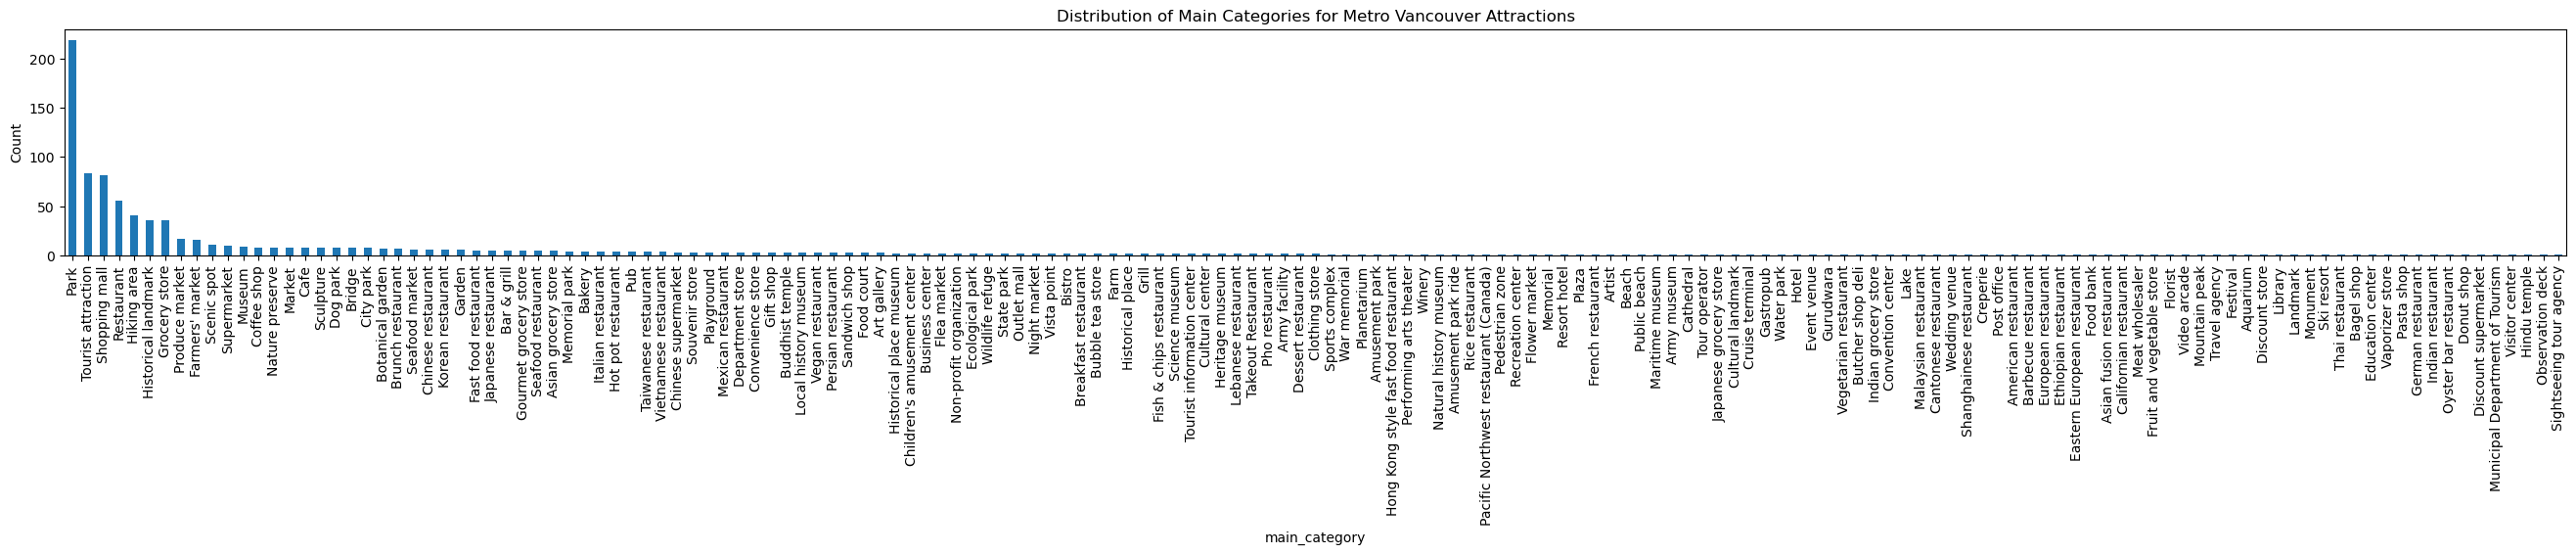

In [9]:
# Check the current number of unique values in Main Category
# plot distribution of current values in main_category column 
plt.figure(figsize=(33,3))
plt.title('Distribution of Main Categories for Metro Vancouver Attractions')
df_van_attractions['main_category'].value_counts().plot(kind='bar')
# sns.barplot(data=df_van_attractions, x="main_category")
plt.xlabel('main_category')
plt.ylabel('Count')
plt.show()

In [10]:
# top 4 main_categories of attractions
df_van_attractions['main_category'].value_counts().head(4)

main_category
Park                  219
Tourist attraction     83
Shopping mall          81
Restaurant             56
Name: count, dtype: int64

From the main_category, there are 161 unique values. Modify the main_cateogry to take the top 4 values and make the rest into an 'other' category. One-Hot Encode the top 4 main categories and drop the other column. The reason for main category modification is easier interpretability in EDA.   

In [11]:
# Modify the Number of Unique Values in Main Category
# Get list of top 4 frequent categories
top_categories = ['Park','Tourist attraction', 'Shopping mall','Restaurant']

# Replace all other categories with 'Other'
df_van_attractions['main_category'] = df_van_attractions['main_category'].apply(lambda x: x if x in top_categories else 'Other')

# check modified main_category column in Dataframe
df_van_attractions['main_category'].value_counts()

main_category
Other                 522
Park                  219
Tourist attraction     83
Shopping mall          81
Restaurant             56
Name: count, dtype: int64

In [12]:
# Apply One-Hot Encoding to main_category column 
df_van_attractions_encoded = pd.get_dummies(df_van_attractions, columns=['main_category'])

# Rename multiple columns in encoded main_category
df_van_attractions_encoded.rename(columns={'main_category_Park': 'MC_park', 
                                           'main_category_Restaurant': 'MC_restaurant',
                                           'main_category_Shopping mall': 'MC_shopping',
                                           'main_category_Tourist attraction': 'MC_tourist'}, inplace=True)

# drop main_category_Other column
df_van_attractions_encoded.drop(columns=['main_category_Other'], inplace=True)

# view final modification of main_category in dataframe 
df_van_attractions_encoded.head()

,name,description,reviews,website,categories,rating,address,review_keywords,MC_park,MC_restaurant,MC_shopping,MC_tourist
place_id,,,,,,,,,,,,
ChIJoQQNT9B3hlQRwbziEuOD0zw,Langley Farm Market,NaN,1489,https://www.langleyfarm.ca/,"Produce market, Supermarket",4.5,"7815 Kingsway, Burnaby, BC V3N 3E4","fresh, meat, parking, deli, local, cashiers, b...",False,False,False,False
ChIJcRtGbQ12hlQRhbiiQ5c-KSA,Kin's Farm Market,NaN,157,http://www.kinsfarmmarket.com/,Produce market,4.2,"7515, 200 Market Crossing #200, Burnaby, BC V5...","prices, quality, deals, mall, clean, parking, ...",False,False,False,False
ChIJRYS9gwJ3hlQRhD73njNeHfY,Marine Way Market,NaN,2178,https://www.facebook.com/MarineWayMarket/,Shopping mall,4.3,"Market Crossing, Burnaby, BC V5J 3J3","parking, groceries, strip mall, choices, coffe...",False,False,True,False
ChIJgzxRoT12hlQRdhSdCsG_S-Q,Hop On Farms,Open in limited capacity during Pop up sales a...,153,https://www.facebook.com/HopOnFarms/,"Produce market, Farmers' market, Garden center",4.7,"5624 Marine Dr, Burnaby, BC V5J 3G8","flowers, eggs, spring, local produce, fall, gr...",False,False,False,False
ChIJzwhBgwh3hlQRtUuytlsraag,Burnaby Artisan Farmers' Market,Vendors sell fresh fruit & handmade wares at t...,296,http://www.artisanmarkets.ca/our-markets/burna...,Farmers' market,4.3,"4949 Canada Wy, Burnaby, BC V5G 4A3","vendors, local, music, parking, baked goods, s...",False,False,False,False



---

## Updated Exploratory Data Analysis

- Check for Null Values
- Check for Duplicated Columns/Rows 
- Distribution of Rating and Review Data

In [13]:
# check for null values in data
df_van_attractions_encoded.isna().sum()

name                 0
description        484
reviews              0
website            280
categories           8
rating               0
address              0
review_keywords    113
MC_park              0
MC_restaurant        0
MC_shopping          0
MC_tourist           0
dtype: int64

In [14]:
# check for rows where null values are present 
null_df = df_van_attractions_encoded.isnull().any(axis=1)
null_rows = df_van_attractions_encoded[null_df]
print(null_rows)

                                                        name description  \
place_id                                                                   
ChIJoQQNT9B3hlQRwbziEuOD0zw              Langley Farm Market         NaN   
ChIJcRtGbQ12hlQRhbiiQ5c-KSA                Kin's Farm Market         NaN   
ChIJRYS9gwJ3hlQRhD73njNeHfY                Marine Way Market         NaN   
ChIJaYzamVZ3hlQR3jJgDsB8Ip8  Parkgate Farm Market Kensington         NaN   
ChIJZX60uzB4hlQROscvUCodE7s                Joe's Farm Market         NaN   
...                                                      ...         ...   
ChIJmfKAD_R0hlQR2etVxiSVvu8                         Ash Park         NaN   
ChIJEWq_7hhxhlQR_k-jUi4iX1I                     Pandora Park         NaN   
ChIJuQ8dDy1vhlQRm4YJmRhKXeg                 John Lawson Pier         NaN   
ChIJYZRldiFyhlQRKAwf2_XOZcc         Ceperley Park Playground         NaN   
ChIJ4eZqHpBzhlQRbF5hkWtQPN8                  Devonshire Park         NaN   

           

In [15]:
# count for duplicated rows in the dataset
len(df_van_attractions_encoded)-len(df_van_attractions_encoded.drop_duplicates())

0

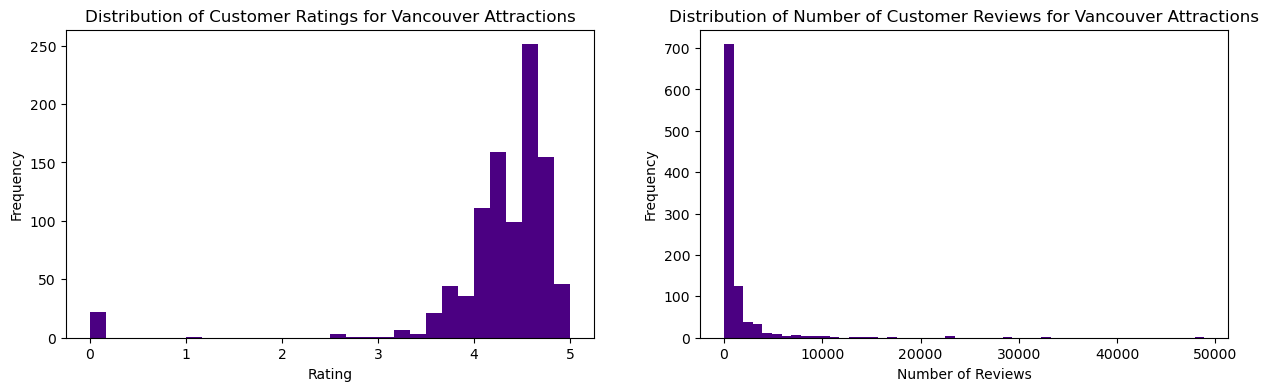

In [16]:
# plot histogram for ratings 
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(df_van_attractions_encoded['rating'],bins=30,color="indigo")
plt.title('Distribution of Customer Ratings for Vancouver Attractions')
plt.xlabel('Rating')
plt.ylabel('Frequency')
# plot histogram for number of reviews
plt.subplot(1,2,2)
plt.hist(df_van_attractions_encoded['reviews'],bins=50,color="indigo")
plt.title('Distribution of Number of Customer Reviews for Vancouver Attractions')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

In [17]:
df_van_attractions_encoded.to_csv('new_van_attractions.csv') 

#### Updated EDA Findings

There are 550 rows of data containing null values out of the total 961 rows. The columns `description`, `website`, and `review_keywords` are where the data has null values. Since values in columns `description` and `website` won't be used in the baseline model, there is no need to replace them at this point. Those columns are meant to give additional insight to users about the attraction. The proprocessing and modelling section will handle the null values located in the `review_keywords` for attractions that have no Google Map reviews.      

There are no rows of duplicated data due to the 'Data cleanup' tab on Google Sheets.

The distribution of updated data for rating and reviews are skewed to a certain range which could impact model evaluation. The rating for attractions is skewed left towards range of 3.5 to 5 stars out of 5. The reason for the skewed ratings can come from how the search engine for Google Maps and their own recommendation model. The number of reviews for attractions is skewed right towards 0-5000 reviews. The next steps would be to transforming the data prior to the baseline model to ensure the columns are treated equally.

For the upcoming preprocessing and modelling, the various clustering models will be explored as there are no known target variables in this dataset. Reviewing and transforming the latitude and longitude of the attraction will be performed to account for geographical proximity in the recommendation system. Text analysis will also be explored to find trends in the `review_keywords` in the dataset. Tranformations of `reviews` and `rating` will be performed for the upcoming baseline model.
